## ***ACWV ETF Prediction with LSTM and ARIMA model***

###Group 18<br>
Abheeshek Gupta (UID:3035601621)<br>
Hsu, Ya Cheng (UID:3035550250)<br>


 
 


Installation of Necessary Libraries

In [0]:
#!pip3 install tensorflow==2.0.0

Introductory header files




In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import io
import matplotlib.pyplot as plt
import os
from subprocess import check_output as co
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import tensorflow_datasets as tfds
# Check if any GPU is detected
print("Is GPU available: ", tf.test.is_gpu_available())
print("GPU(s) found: ")
print(tf.config.experimental.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available:  True
GPU(s) found: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [0]:
from google.colab import files
uploaded = files.upload()

Saving acwv.us.csv to acwv.us.csv


In [0]:
df_raw= pd.read_csv(io.StringIO(uploaded['acwv.us.csv'].decode('utf-8')))
df_raw.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2011-10-26,45.798,45.860,45.654,45.654,783,0
1,2011-10-27,46.755,46.755,46.755,46.755,110,0
2,2011-10-28,46.325,46.459,46.325,46.459,1117,0
3,2011-10-31,45.889,45.889,45.512,45.512,335,0
4,2011-11-01,52.477,52.477,44.887,44.887,51601,0


In [0]:
df=df_raw.copy()
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2011-10-26,45.798,45.860,45.654,45.654,783,0
1,2011-10-27,46.755,46.755,46.755,46.755,110,0
2,2011-10-28,46.325,46.459,46.325,46.459,1117,0
3,2011-10-31,45.889,45.889,45.512,45.512,335,0
4,2011-11-01,52.477,52.477,44.887,44.887,51601,0


In [0]:
df = df.drop(['Volume','OpenInt'], axis=1)
df.head(22)

,Date,Open,High,Low,Close
0,2011-10-26,45.798,45.860,45.654,45.654
1,2011-10-27,46.755,46.755,46.755,46.755
2,2011-10-28,46.325,46.459,46.325,46.459
3,2011-10-31,45.889,45.889,45.512,45.512
4,2011-11-01,52.477,52.477,44.887,44.887
5,2011-11-02,45.135,45.190,44.877,45.190
6,2011-11-03,45.538,45.725,45.448,45.725
7,2011-11-04,45.279,45.334,45.279,45.296
8,2011-11-07,45.424,45.619,45.424,45.619
9,2011-11-08,46.030,46.030,46.030,46.030


In [0]:

df1=df.copy()
df1['Date']=pd.to_datetime(df1['Date'], format="%Y-%m-%d")
df1 = df1.set_index('Date')
li=[]
for i in range(4):
  for j in range(0,100,20):
    index=df1.iloc[j:1500:100,i].reset_index(drop=True) #reset_index to drop datetime index
    li.append(index)
data_df=pd.concat(li,axis=1,ignore_index=True)
data_df.columns = data_df.columns.astype(str)
print(data_df)
print(data_df.shape)



         0       1       2       3  ...      16      17      18      19
0   45.798  44.062  46.182  47.694  ...  44.062  46.182  47.694  48.596
1   48.758  46.809  49.006  50.947  ...  46.441  49.275  49.886  50.273
2   50.768  50.533  50.505  50.237  ...  50.389  50.380  50.110  51.630
3   52.699  54.766  56.275  57.604  ...  54.928  56.303  57.506  55.507
4   56.598  56.453  55.826  56.163  ...  56.317  55.544  56.554  58.000
5   57.753  57.862  55.511  58.774  ...  57.835  55.575  59.043  59.383
6   60.426  61.191  62.429  63.343  ...  61.367  62.326  62.822  63.353
7   62.485  62.485  64.976  64.462  ...  62.299  64.985  64.962  66.245
8   66.905  66.878  69.216  69.140  ...  67.727  69.253  69.414  67.056
9   67.435  67.997  63.861  65.472  ...  68.254  64.041  65.290  67.644
10  67.176  67.280  65.640  67.445  ...  66.837  66.152  67.956  71.188
11  71.237  70.928  72.943  75.498  ...  70.985  73.128  75.703  75.215
12  73.518  72.300  70.408  72.144  ...  72.144  70.350  72.251 

In [0]:
#train/test split
train_df=data_df[:13]
dev_df=data_df[1:14]
test_df=data_df[2:15]

In [0]:
print(train_df.head())
print(train_df.tail())
print(test_df.head())
print(test_df.tail())

        0       1       2       3  ...      16      17      18      19
0  45.798  44.062  46.182  47.694  ...  44.062  46.182  47.694  48.596
1  48.758  46.809  49.006  50.947  ...  46.441  49.275  49.886  50.273
2  50.768  50.533  50.505  50.237  ...  50.389  50.380  50.110  51.630
3  52.699  54.766  56.275  57.604  ...  54.928  56.303  57.506  55.507
4  56.598  56.453  55.826  56.163  ...  56.317  55.544  56.554  58.000

[5 rows x 20 columns]
         0       1       2       3  ...      16      17      18      19
8   66.905  66.878  69.216  69.140  ...  67.727  69.253  69.414  67.056
9   67.435  67.997  63.861  65.472  ...  68.254  64.041  65.290  67.644
10  67.176  67.280  65.640  67.445  ...  66.837  66.152  67.956  71.188
11  71.237  70.928  72.943  75.498  ...  70.985  73.128  75.703  75.215
12  73.518  72.300  70.408  72.144  ...  72.144  70.350  72.251  72.819

[5 rows x 20 columns]
        0       1       2       3  ...      16      17      18      19
2  50.768  50.533  50.505

In [0]:
print("Training Dataset:")
print(train_df.info())
print("------------------------")
print("Test Dataset:")
print(test_df.info())

Training Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
 1   1       13 non-null     float64
 2   2       13 non-null     float64
 3   3       13 non-null     float64
 4   4       13 non-null     float64
 5   5       13 non-null     float64
 6   6       13 non-null     float64
 7   7       13 non-null     float64
 8   8       13 non-null     float64
 9   9       13 non-null     float64
 10  10      13 non-null     float64
 11  11      13 non-null     float64
 12  12      13 non-null     float64
 13  13      13 non-null     float64
 14  14      13 non-null     float64
 15  15      13 non-null     float64
 16  16      13 non-null     float64
 17  17      13 non-null     float64
 18  18      13 non-null     float64
 19  19      13 non-null     float64
dtypes: float64(20)
memory usage: 2.2 KB
None
-------------------

#ARIMA 


In this section, we tried to use ARIMA model to predict the ETF price by determining the parameters used in ARIMA, denoted by p, d, and q. To better explain the model, we need to know what p, q, and r is first. 

p: number of previous observations necessary to predict ETF at present time, which can be determined using the autocorrelation_plot and its intersection with the dotted upper boundary of the confident interval.

d: the order of differentiation (1 in general)

q: number of moving average jumps deployed to predict the current ETF, which can be determined by the pacf graph.



0


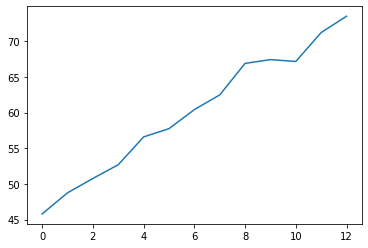

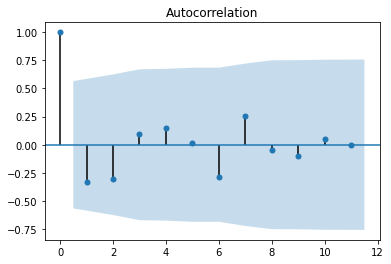

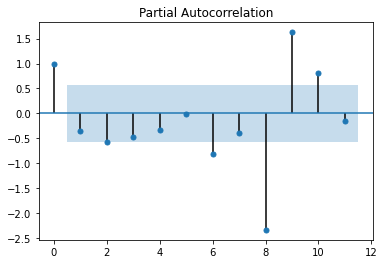

----------------------------------
1


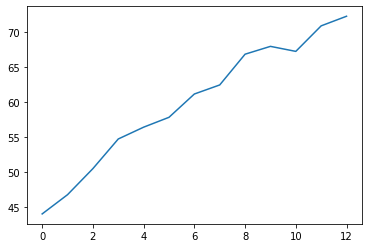

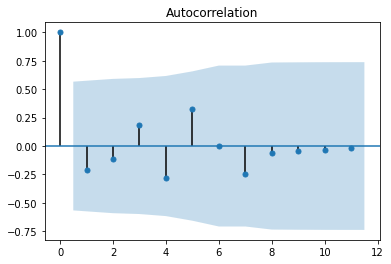

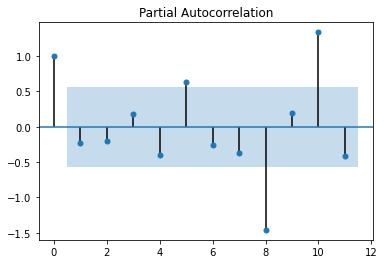

----------------------------------
2


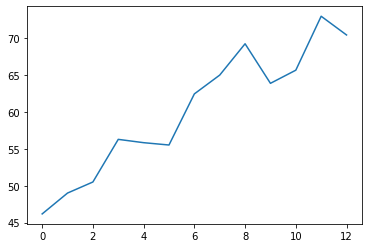

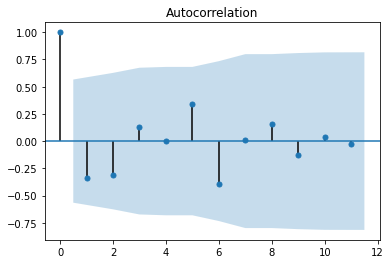

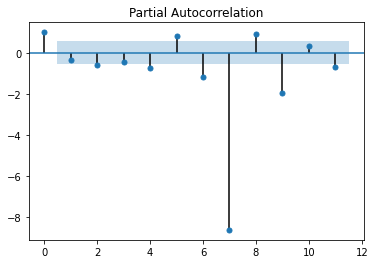

----------------------------------
3


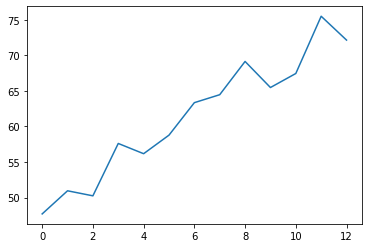

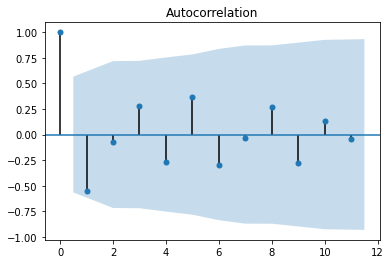

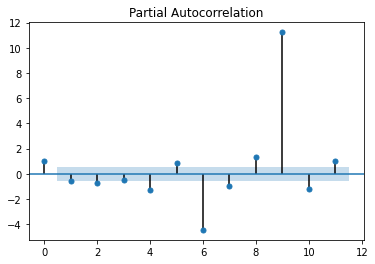

----------------------------------
4


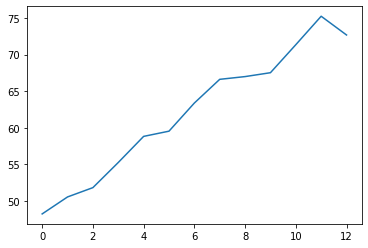

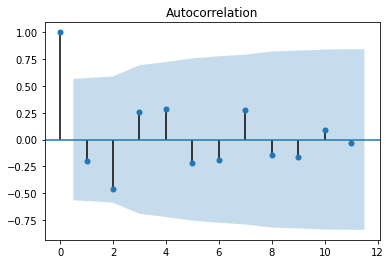

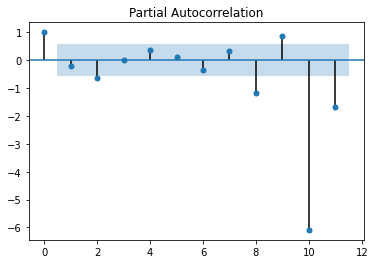

----------------------------------
5


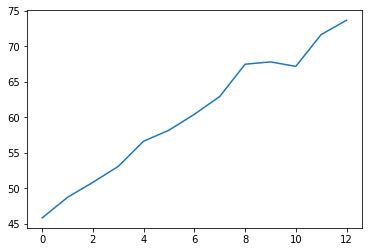

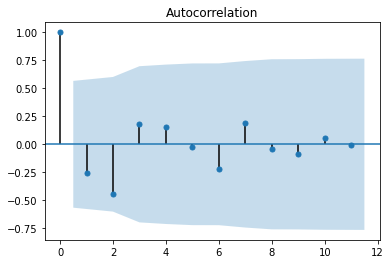

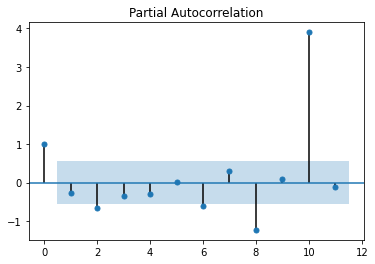

----------------------------------
6


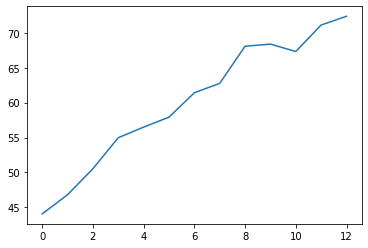

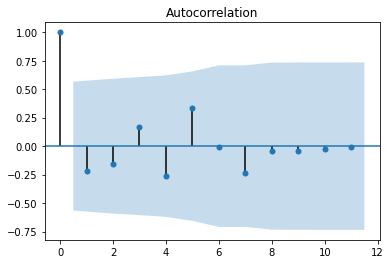

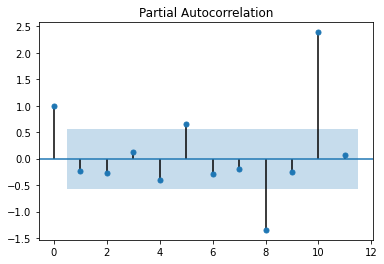

----------------------------------
7


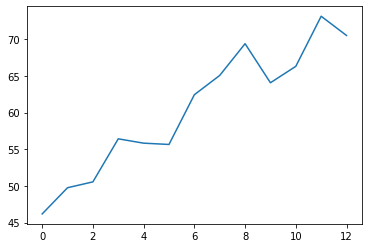

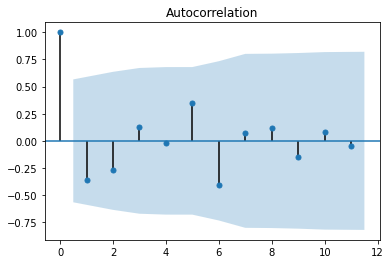

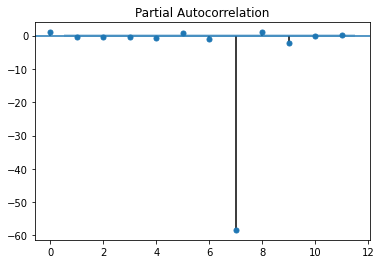

----------------------------------
8


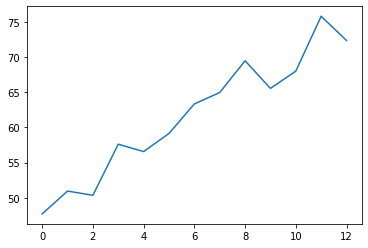

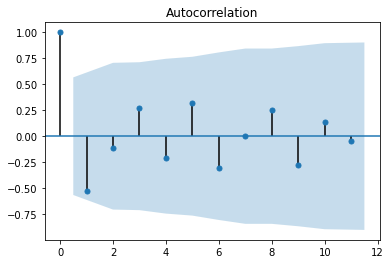

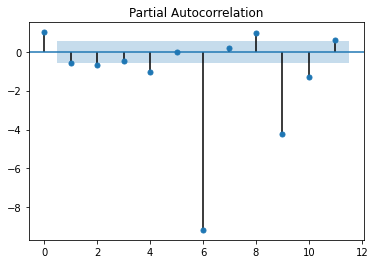

----------------------------------
9


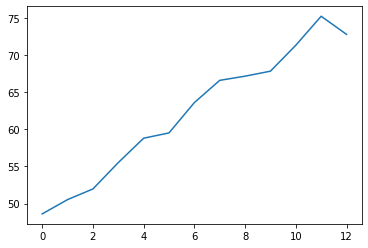

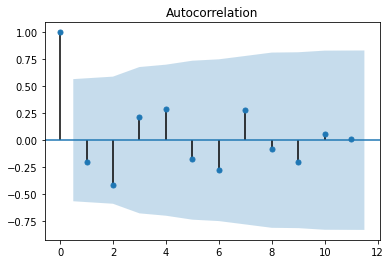

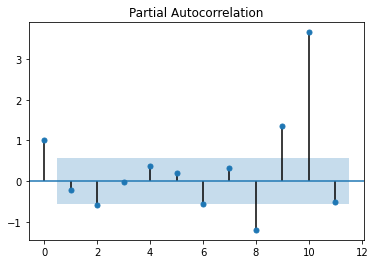

----------------------------------
10


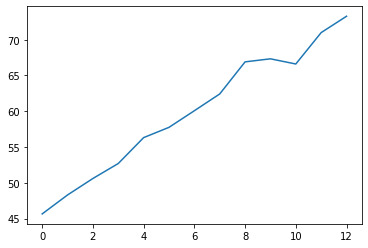

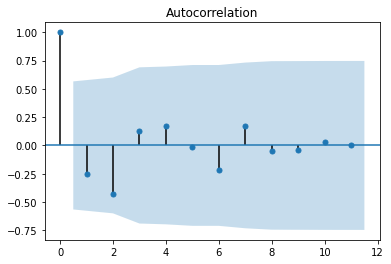

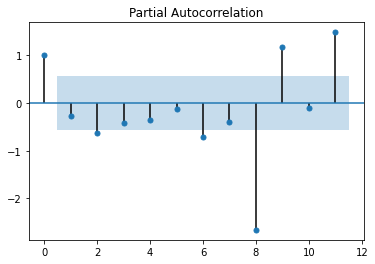

----------------------------------
11


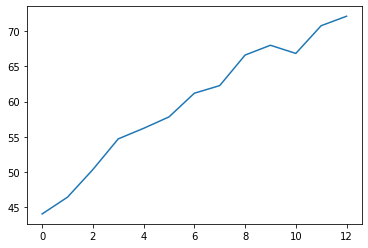

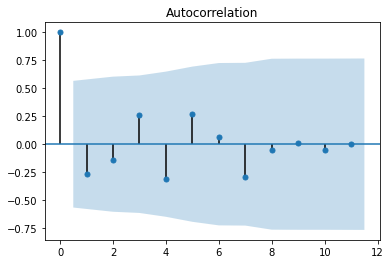

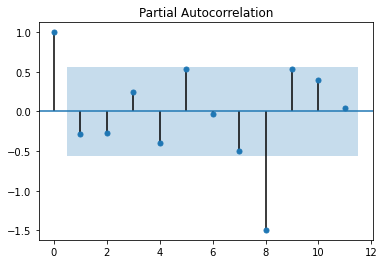

----------------------------------
12


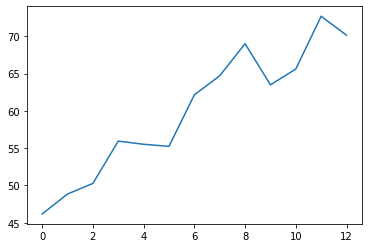

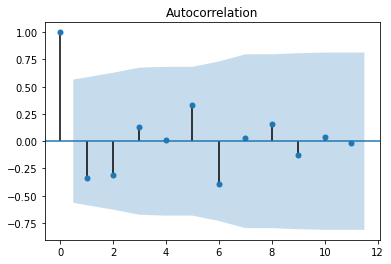

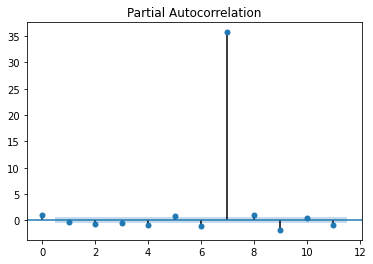

----------------------------------
13


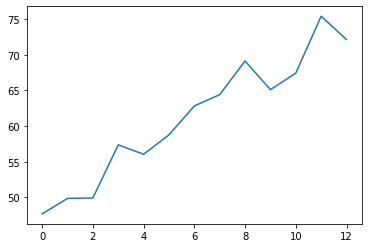

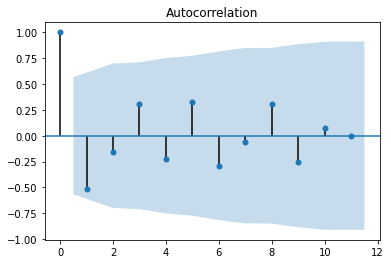

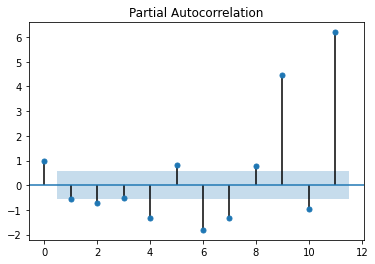

----------------------------------
14


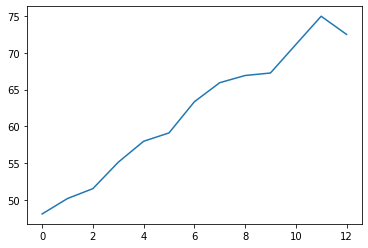

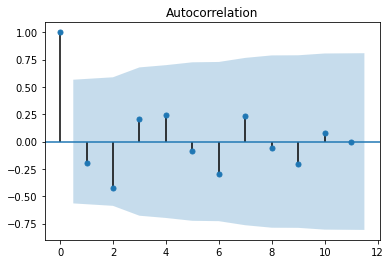

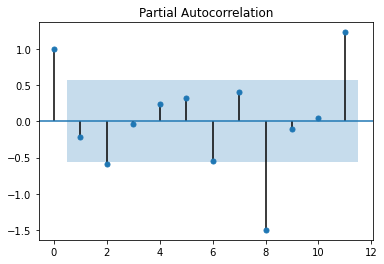

----------------------------------
15


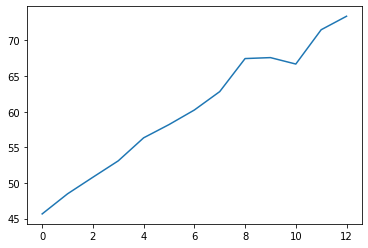

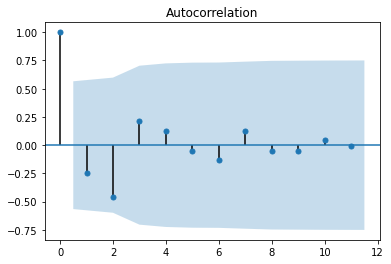

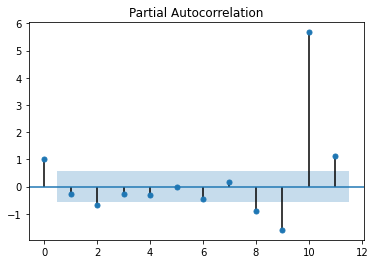

----------------------------------
16


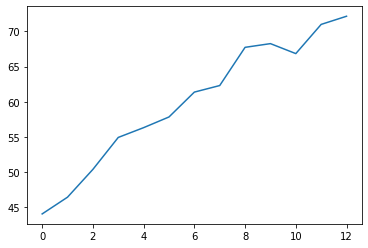

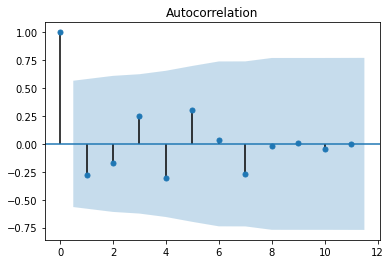

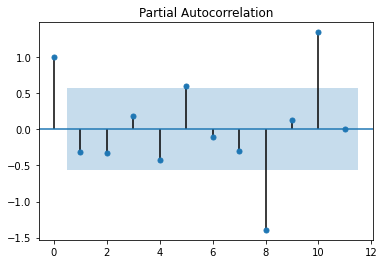

----------------------------------
17


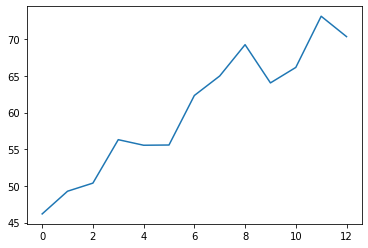

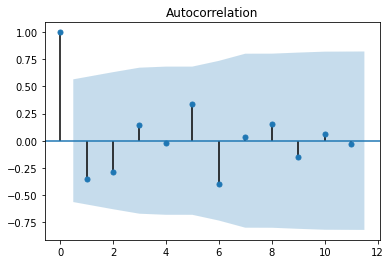

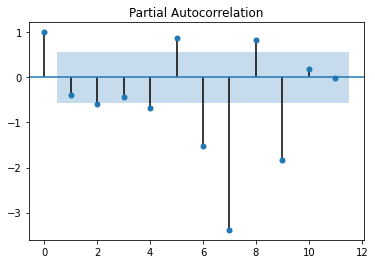

----------------------------------
18


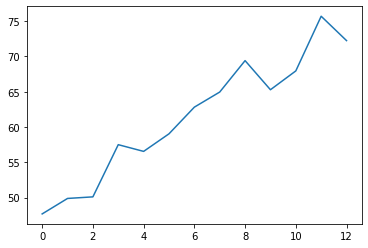

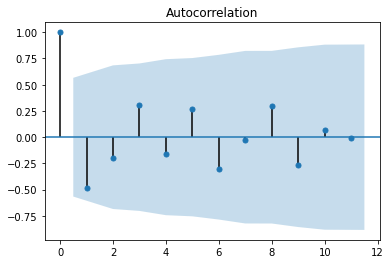

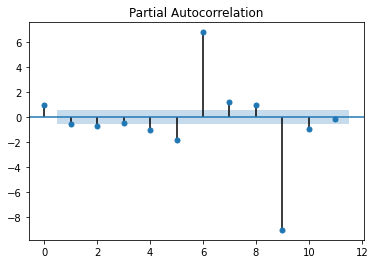

----------------------------------
19


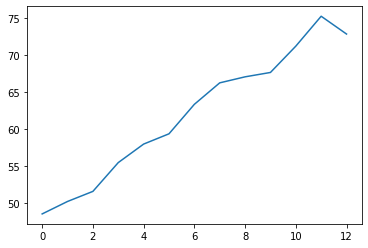

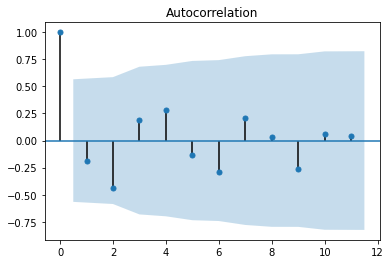

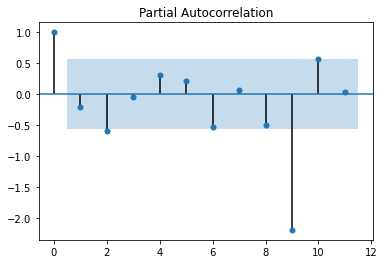

----------------------------------


In [0]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

for i in range(20):
  print(i)
  train_df[str(i)].plot()
  plt.show()
  plt.close()

  plot_acf(train_df[str(i)].diff()[1:]) # diff(): default 1-order difference ; [1:] cuz 1st value is NaN
  plt.show()
  plt.close()
  plot_pacf(train_df[str(i)].diff()[1:])
  plt.show()
  plt.close()
  print("----------------------------------")




In [0]:
import warnings
warnings.filterwarnings("ignore")

datasets=[train_df,dev_df,test_df]
orders=[]
for i in range(2):
  for j in range(2):
    orders.append((i,1,j))

print(orders)

models=[]
for i in range(20):
  print(i)
  for d in datasets:
    best=0
    aic=1000
    for j in range (6):
      try:
        model = ARIMA(d[str(i)],order=orders[j])
        model_fit = model.fit()
        if (model_fit.aic<aic):
          best=j
          aic=model_fit.aic
      except:
        pass
    model=ARIMA(d[str(i)],order=orders[best]).fit()
    models.append(model)
 






[(0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1)]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


"\nmodels=[]\nmodel = ARIMA(train_df['0'],order=(0,1,1)).fit()\nprint(train_df['0'].shape)\nmodels.append(model)\nmodel = ARIMA(train_df['1'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['2'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['3'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['4'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['5'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['6'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['7'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['8'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['9'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['10'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['11'],order=(0,1,1)).fit()\nmodels.append(model)\nmodel = ARIMA(train_df['12'],order=(0,1,0)).fit()\nmodels.append(model)\nmodel = ARIMA(train

0


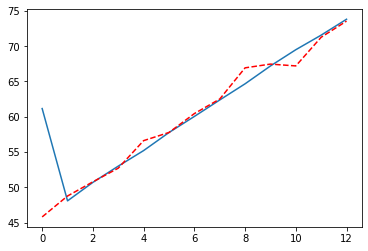

3


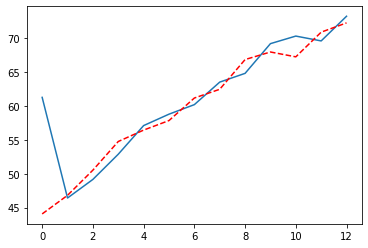

6


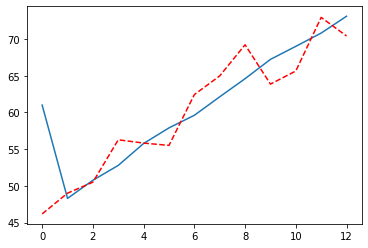

9


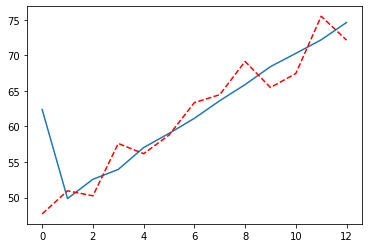

12


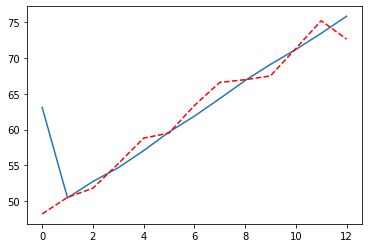

15


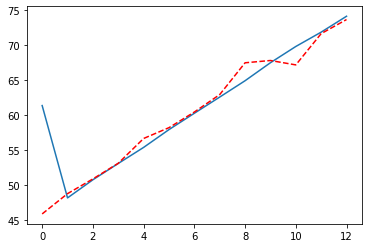

18


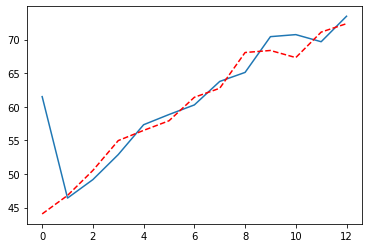

21


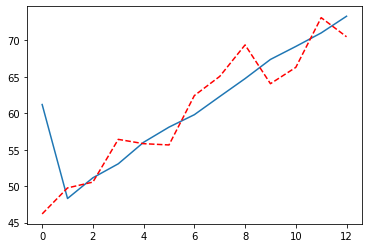

24


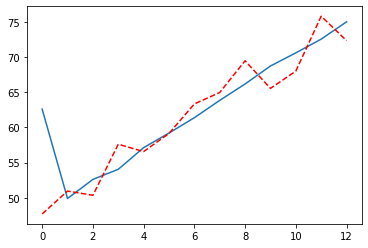

27


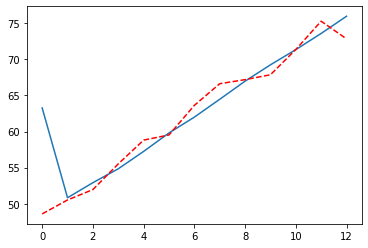

30


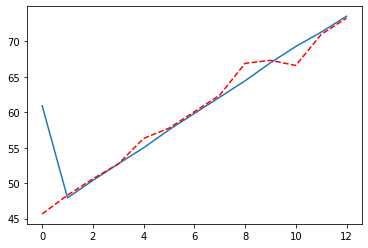

33


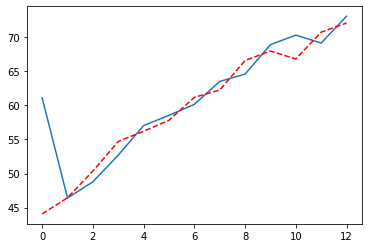

36


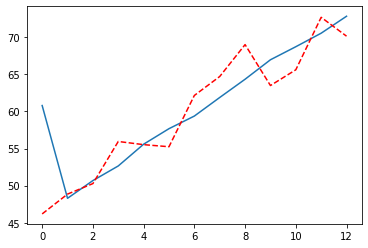

39


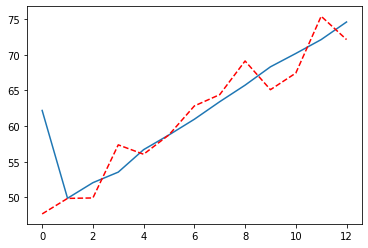

42


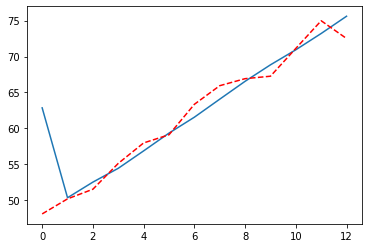

45


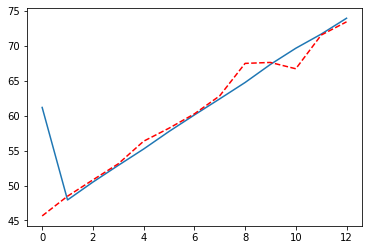

48


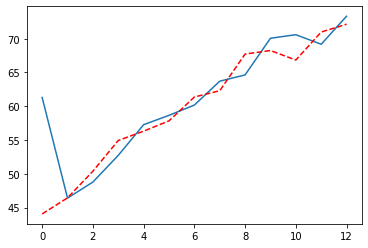

51


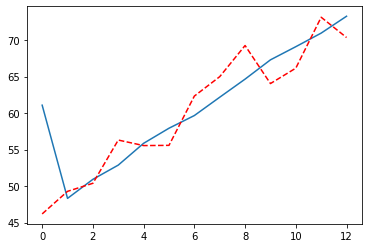

54


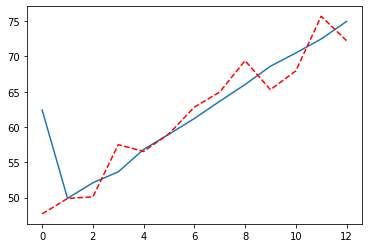

57


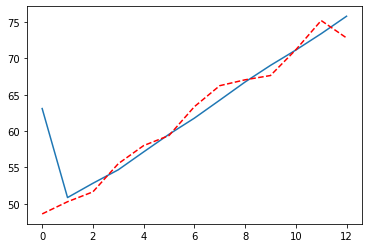

1


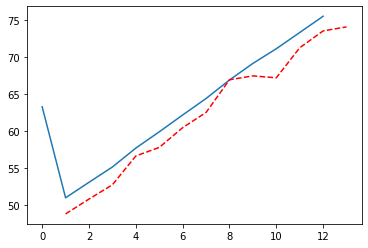

4


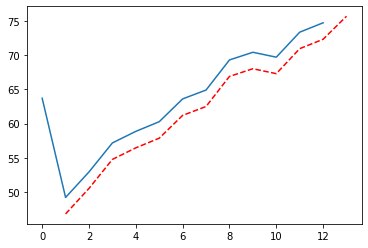

7


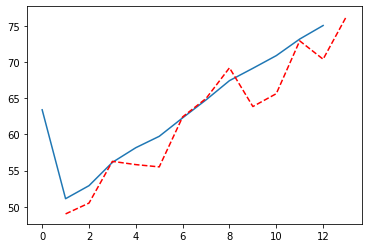

10


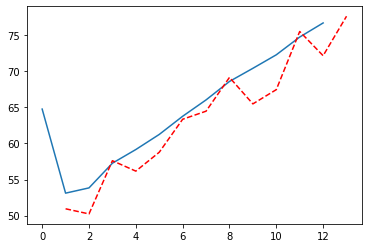

13


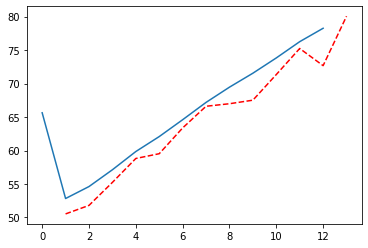

16


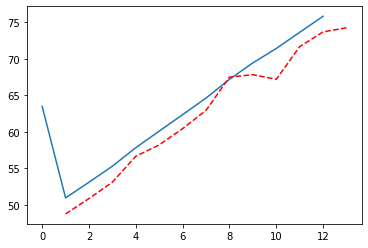

19


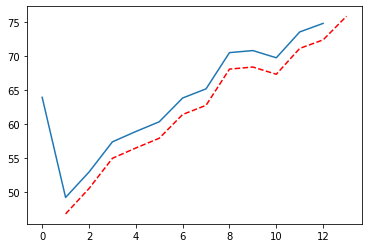

22


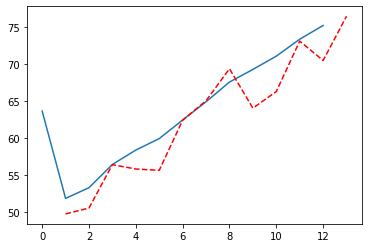

25


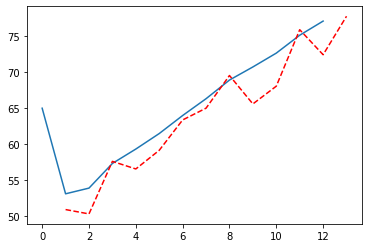

28


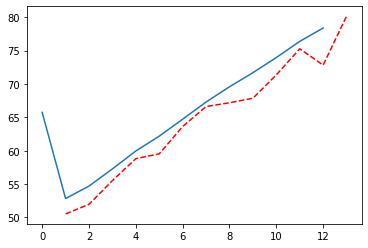

31


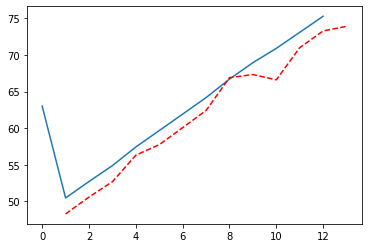

34


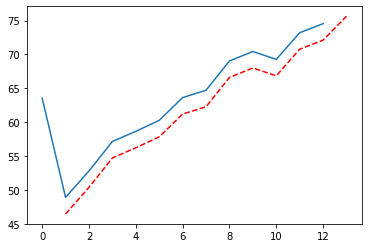

37


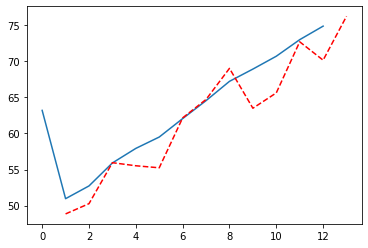

40


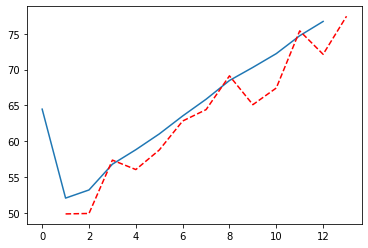

43


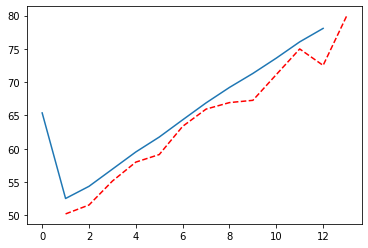

46


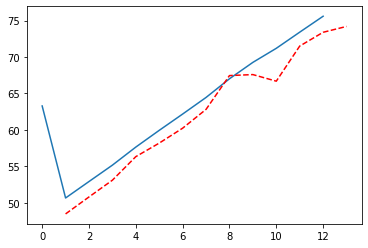

49


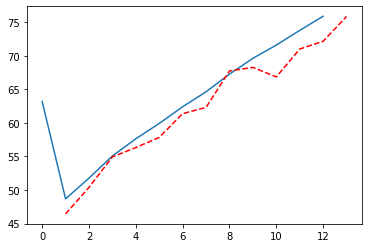

52


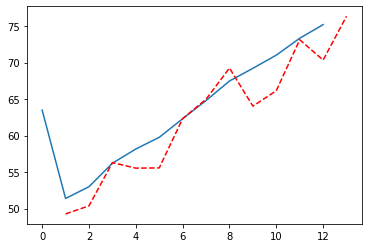

55


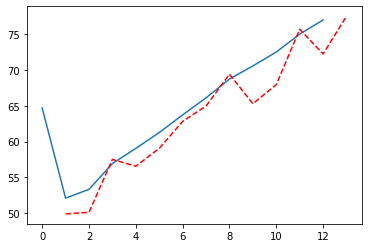

58


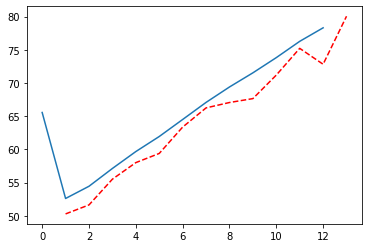

2


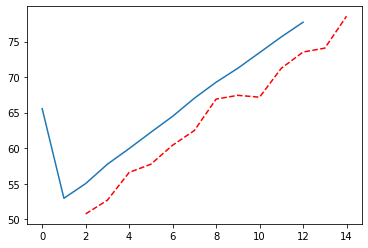

5


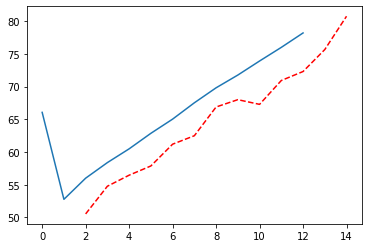

8


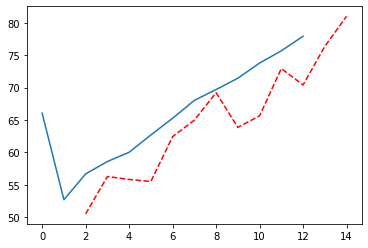

11


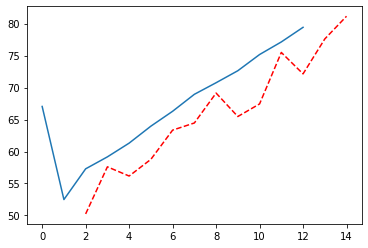

14


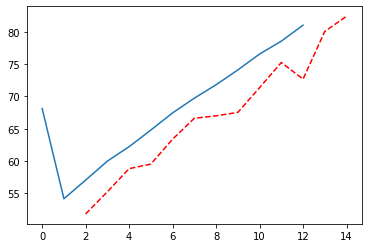

17


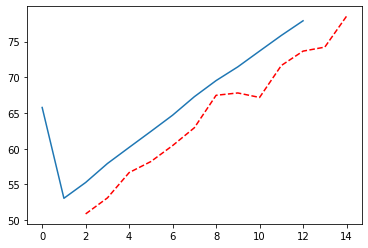

20


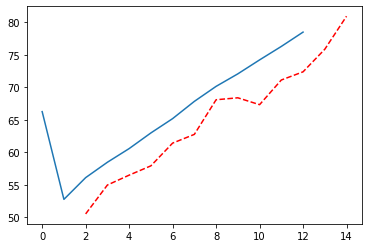

23


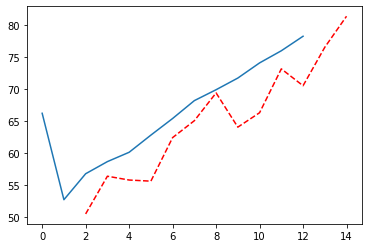

26


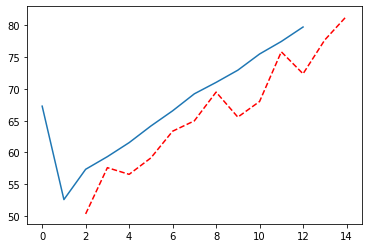

29


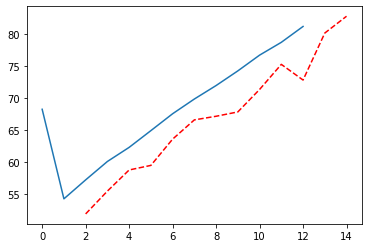

32


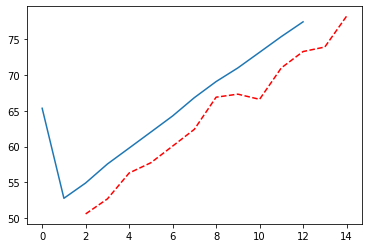

35


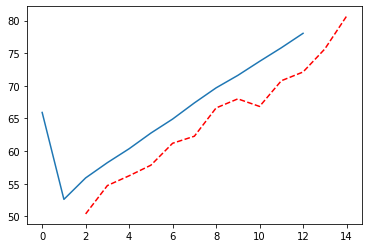

38


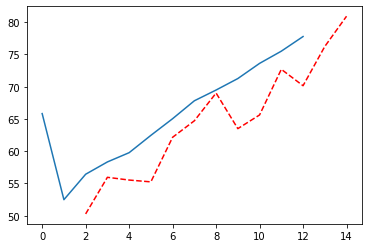

41


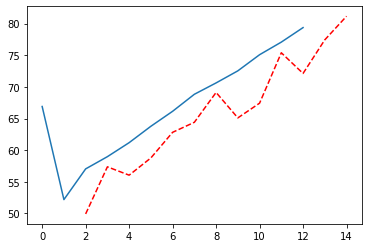

44


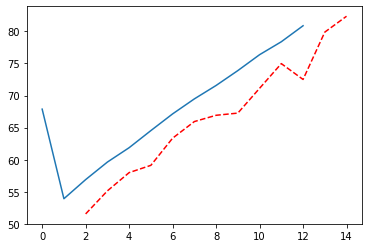

47


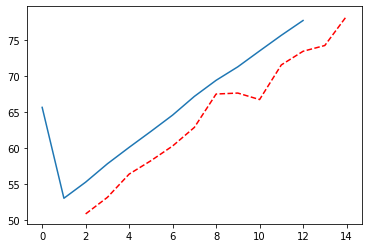

50


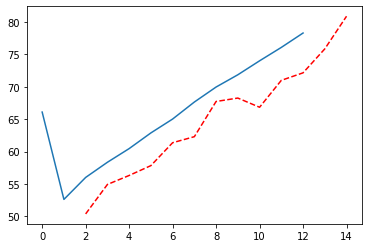

53


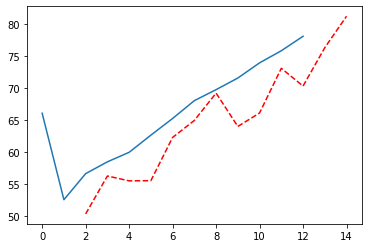

56


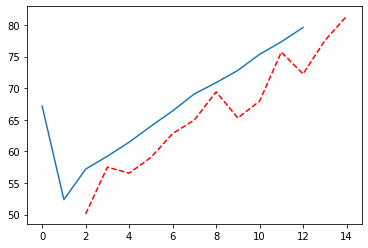

59


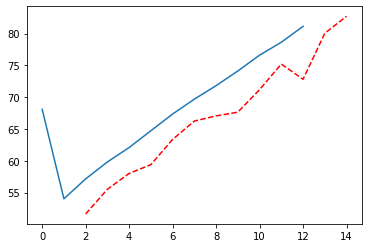

           0         1         2   ...        9         10        11
0  -15.341258  0.685819  0.078728  ...  0.265205 -2.294497 -0.299088
1  -17.228167  0.393833  1.370833  ... -1.234167 -3.070167  1.294833
2  -14.817513  0.710901 -0.258648  ... -3.362939 -3.360744  2.134679
3  -14.683736  1.090731 -2.326904  ... -2.935346 -2.831081  3.317021
4  -14.910351  0.074901 -0.935648  ... -1.611939  0.134156  1.766861
5  -15.500325  0.606626  0.119940  ...  0.318021 -2.636155 -0.212878
6  -17.449667  0.388167  1.365167  ... -2.056833 -3.416833  1.433167
7  -15.017841  1.453077 -0.591385  ... -3.330615 -2.873477  2.097825
8  -14.908532  1.062808 -2.260788  ... -3.183073 -2.598958  3.258119
9  -14.665612 -0.309593 -0.955390  ... -1.377300  0.020836  1.691349
10 -15.268904  0.378956  0.223434  ...  0.348225 -2.679642 -0.316082
11 -17.049333  0.041333  1.584333  ... -0.944667 -3.497667  1.598333
12 -14.618433  0.563445 -0.405832  ... -3.475441 -3.111452  2.141852
13 -14.494104 -0.019016 -2.139525 

In [0]:
train_X = []
train_Y = []
dev_X=[]
dev_Y=[]
test_X=[]
test_Y=[]
#from pyramid.arima import ARIMA
for i in range(0,60,3):
  print(i)

  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) # levels: predict original｜linear: predict differenced
  predictions = [np.mean(predictions)] +predictions # pad the first time step with prediction mean
  plt.plot(predictions)
  plt.plot(train_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()


  residual=pd.Series(np.array(train_df[str(i//3)])-np.array(predictions))
  train_X.append(residual[:12])
  train_Y.append(residual[12])

for i in range(1,60,3):
  print(i)
  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) 
  predictions = [np.mean(predictions)] +predictions 
  plt.plot(predictions)
  plt.plot(dev_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()


  residual=pd.Series(np.array(dev_df[str(i//3)])-np.array(predictions))
  residual = residual.transpose()
  dev_X.append(residual[:12])
  dev_Y.append(residual[12])  

for i in range(2,60,3):
  print(i)
  predictions = list(models[i].predict(start=1,typ='levels',dynamic=False)) 
  predictions = [np.mean(predictions)] +predictions 
  plt.plot(predictions)
  plt.plot(test_df[str(i//3)],color='red',linestyle='--')
  plt.show()
  plt.close()


  residual=pd.Series(np.array(test_df[str(i//3)])-np.array(predictions))
  residual = residual.transpose()
  test_X.append(residual[:12])
  test_Y.append(residual[12]) 


train_X = pd.concat(train_X,axis=1).transpose()
train_Y = pd.DataFrame(train_Y)
print(train_X)
print(train_Y)

dev_X = pd.concat(dev_X,axis=1).transpose()
dev_Y = pd.DataFrame(dev_Y)
print(dev_X)
print(dev_Y)

test_X = pd.concat(test_X,axis=1).transpose()
test_Y = pd.DataFrame(test_Y)
print(test_X)
print(test_Y)



#LSTM Model






In [0]:

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1_l2



from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
# data sampling
STEP = 20


_train_X = np.asarray(train_X).reshape(20, 12, 1)
_dev_X = np.asarray(dev_X).reshape((20, 12, 1))
_test_X = np.asarray(test_X).reshape(20, 12, 1)

_train_Y = np.asarray(train_Y).reshape(20, 1)
_dev_Y = np.asarray(dev_Y).reshape(20, 1)
_test_Y = np.asarray(test_Y).reshape(20, 1)


In [0]:
#define custom activation
class Double_Tanh(Activation):
    def __init__(self, activation, **kwargs):
        super(Double_Tanh, self).__init__(activation, **kwargs)
        self.__name__ = 'double_tanh'

def double_tanh(x):
    return (K.tanh(x) * 2)

get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})

In [0]:
print (_train_X)
print (_train_Y)

[[[-1.53412583e+01]
  [ 6.85818685e-01]
  [ 7.87280270e-02]
  [-2.90695964e-01]
  [ 1.40679671e+00]
  [ 6.25605399e-03]
  [ 4.04032063e-01]
  [ 1.31131882e-01]
  [ 2.26055908e+00]
  [ 2.65204534e-01]
  [-2.29449723e+00]
  [-2.99087892e-01]]

 [[-1.72281667e+01]
  [ 3.93833333e-01]
  [ 1.37083333e+00]
  [ 1.87983333e+00]
  [-6.66166667e-01]
  [-9.44166667e-01]
  [ 9.75833333e-01]
  [-1.05916667e+00]
  [ 2.03983333e+00]
  [-1.23416667e+00]
  [-3.07016667e+00]
  [ 1.29483333e+00]]

 [[-1.48175132e+01]
  [ 7.10901099e-01]
  [-2.58648352e-01]
  [ 3.48446886e+00]
  [ 5.12527469e-02]
  [-2.38709670e+00]
  [ 2.81565385e+00]
  [ 2.84731868e+00]
  [ 4.61830494e+00]
  [-3.36293895e+00]
  [-3.36074396e+00]
  [ 2.13467932e+00]]

 [[-1.46837357e+01]
  [ 1.09073078e+00]
  [-2.32690384e+00]
  [ 3.65346155e+00]
  [-8.63173060e-01]
  [-2.41807672e-01]
  [ 2.20522438e+00]
  [ 8.46923104e-01]
  [ 3.25678849e+00]
  [-2.93534612e+00]
  [-2.83108073e+00]
  [ 3.31702102e+00]]

 [[-1.49103515e+01]
  [ 7.490110

In [0]:
model = Sequential()
#check https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/
model.add(LSTM(33, input_shape=(12,1), dropout=0.0, kernel_regularizer=l1_l2(0.00,0.00), bias_regularizer=l1_l2(0.00,0.00)))
model.add(Dense(1))
model.add(Activation(double_tanh))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

print(model.metrics_names)
#model.fit(_train_X, _train_Y, epochs=100, batch_size=500, shuffle=True)
#, kernel_regularizer=l1_l2(0,0.1), bias_regularizer=l1_l2(0,0.1),

['loss', 'mse', 'mae']


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
print(_train_X.shape)
print(_train_Y.shape)


(20, 12, 1)
(20, 1)


In [0]:
model_scores = {}
Reg = False
d = 'hybrid_LSTM'

if Reg :
    d += '_with_reg'

epoch_num=1
for _ in range(100):
    dir = 'gdrive/My Drive/AI Project/models/'+d
    file_list = os.listdir(dir)
    print(file_list)
    if len(file_list) != 0 :
        epoch_num = len(file_list) + 1
        recent_model_name = '/epoch'+str(epoch_num-1)+'.h5'
        filepath = dir + recent_model_name
        model = load_model(filepath)

    filepath = dir + '/epoch'+str(epoch_num)+'.h5'

    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
    callbacks_list = [checkpoint]
    if len(callbacks_list) == 0:
        model.fit(_train_X, _train_Y, epochs=1, batch_size=1, shuffle=True)
    else:
        model.fit(_train_X, _train_Y, epochs=1, batch_size=1, shuffle=True, callbacks=callbacks_list)
    
    score_train = model.evaluate(_train_X, _train_Y)
    score_dev = model.evaluate(_dev_X, _dev_Y)
    score_test = model.evaluate(_test_X, _test_Y)
    
    print('train set score : mse - ' + str(score_train[1]) +' / mae - ' + str(score_train[2]))
    print('dev set score : mse - ' + str(score_dev[1]) +' / mae - ' + str(score_dev[2]))
    print('test set score : mse - ' + str(score_test[1]) +' / mae - ' + str(score_test[2]))

    # get former score data
    df = pd.read_csv(dir+".csv")
    train_mse = list(df['TRAIN_MSE'])
    dev_mse = list(df['DEV_MSE'])
    test_mse = list(df['TEST_MSE'])

    train_mae = list(df['TRAIN_MAE'])
    dev_mae = list(df['DEV_MAE'])
    test_mae = list(df['TEST_MAE'])

    # append new data
    train_mse.append(score_train[1])
    dev_mse.append(score_dev[1])
    test_mse.append(score_test[1])

    train_mae.append(score_train[2])
    dev_mae.append(score_dev[2])
    test_mae.append(score_test[2])

    # organize newly created score dataset
    model_scores['TRAIN_MSE'] = train_mse
    model_scores['DEV_MSE'] = dev_mse
    model_scores['TEST_MSE'] = test_mse

    model_scores['TRAIN_MAE'] = train_mae
    model_scores['DEV_MAE'] = dev_mae
    model_scores['TEST_MAE'] = test_mae

    model_scores_df = pd.DataFrame(model_scores)
    model_scores_df.to_csv(dir+".csv")


['epoch1.h5']
Epoch 1/1
20/20 [==============================] - 1s 48ms/step - loss: 1.5223 - mse: 1.5223 - mae: 1.0644

Epoch 00001: saving model to gdrive/My Drive/AI Project/models/hybrid_LSTM/epoch2.h5
20/20 [==============================] - 0s 231us/step
train set score : mse - 1.0551834106445312 / mae - 0.9599836468696594
dev set score : mse - 4.0318121910095215 / mae - 1.788185715675354
test set score : mse - 10.478851318359375 / mae - 3.1394524574279785
['epoch1.h5', 'epoch2.h5']
Epoch 1/1
20/20 [==============================] - 1s 50ms/step - loss: 1.0010 - mse: 1.0010 - mae: 0.9437

Epoch 00001: saving model to gdrive/My Drive/AI Project/models/hybrid_LSTM/epoch3.h5
20/20 [==============================] - 0s 241us/step
train set score : mse - 0.9958670735359192 / mae - 0.9513956904411316
dev set score : mse - 4.766146659851074 / mae - 1.9730157852172852
test set score : mse - 11.621824264526367 / mae - 3.3174586296081543
['epoch1.h5', 'epoch2.h5', 'epoch3.h5']
Epoch 1/1
2

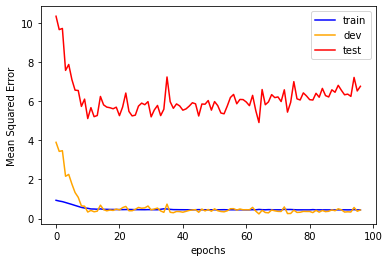

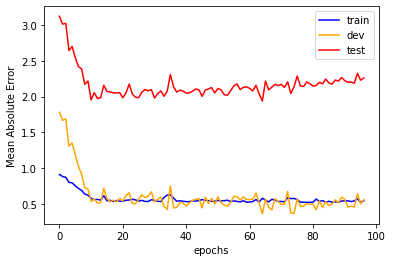

In [0]:
performance = pd.read_csv(dir+'.csv')

mse=['TRAIN_MSE','DEV_MSE','TEST_MSE']
mae = ['TRAIN_MAE','DEV_MAE','TEST_MAE']

plt.plot(performance[mse[0]][:124],color='blue',label='train')
plt.plot(performance[mse[1]][:124],color='orange',label='dev')
plt.plot(performance[mse[2]][:124],color='red',label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()

plt.plot(performance[mae[0]][:124],color='blue',label='train')
plt.plot(performance[mae[1]][:124],color='orange',label='dev')
plt.plot(performance[mae[2]][:124],color='red',label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()

[1.0894804]
[-1.47959522e+01 -2.67401094e-01  1.56689836e+00  1.19781163e-03
  4.75497265e-01  2.40996717e-01  2.42242950e+00  4.07967052e-01
 -2.10042992e+00 -4.44991537e-03  7.85939820e-02 -1.57895202e+00]
[0.83822622]
[-14.79595217017335, -0.2674010941850753, 1.5668983587223835, 0.0011978116298507757, 0.4754972645373101, 0.2409967174447729, 2.4224295036855636, 0.4079670518311218, -2.1004299238328485, -0.0044499153698325244, 0.07859398198208112, -1.5789520196559153, 0.8382262211303413]


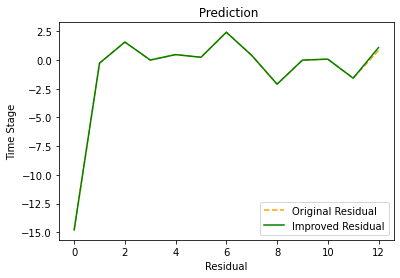

In [0]:
model = load_model(dir+'/epoch69.h5')


predictions = model.predict(_test_X)

print(_test_X[0,0:].ravel())
print(_test_Y[0,0:].ravel())
print(predictions[0,0:].ravel())


graph=list(_test_X[0,0:].ravel())+list(_test_Y[0,0:].ravel())
graph_improve=list(_test_X[0,0:].ravel())+list(predictions[0,0:].ravel())

plt.plot(graph, color = 'Orange', label = 'Original Residual',linestyle='--')
plt.plot(graph_improve, color = 'green', label = 'Improved Residual')
plt.title(' Prediction')
plt.xlabel('Residual')
plt.ylabel('Time Stage')
plt.legend()
plt.show()


## Reference 
https://blog.usejournal.com/stock-market-prediction-by-recurrent-neural-network-on-lstm-model-56de700bff68

https://github.com/TannerGilbert/Tutorials/blob/master/Keras-Tutorials/5.%20Stock%20Price%20Prediction%20using%20a%20Recurrent%20Neural%20Network/Stock%20Price%20Prediction.ipynb